<a href="https://colab.research.google.com/github/grandfatherr/Hass-consult-predictions/blob/main/Edwin_Mutuma_Core_Module_2_Week_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting housing prices

##1.0 Defining the question

###1.0.1 Specifying the question

Tasked with studying the factors that affect housing prices using given information on real estate properties that was collected over the past few months and later on create a model that would allow Hass consulting to accurately predict the prices of homes given predictor variables. 

###1.0.2 Defining the metric for success

This project will be deemed successful if we can show the influence of the different factors on the housing prices and create a model that can predict the prices as accurately as possible

###1.0.3 Understanding the context
Being a company that offers investment-grade developments all over the City, Hass consult has risen to become a leader in its field - real estate. By curating developments that have been conceptualized for high rental returns and an escalated rate of capital growth, it's one of it aims to remain an industry leader.

This project will help cement Hass as an industry leader by giving them the advantage allowing them the ability to identify those factors that greatly affect housing prices and how they individually affect the prices. 

###1.0.4 Recording the experimental design



*   Reading the datasets into our notebook



*   Cleaning the dataset




*   Perform EDA


*   Perform any relevant feature engineering




*   Implement the Solution using various regressions: Multiple Linear Regression, Quantile Regression, Ridge Regression, Lasso Regression and Elastic Net Regression regression methods.

###1.0.5 Data relevance



##1.1 Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

##1.2 Checking the data

In [2]:
# Checking the top of our data
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [3]:
# Look at the bottom of the data
df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [4]:
# Generating a random sample from the data
df.sample(5)

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
2862   9477100490   441500.0         3  ... -122.194           1440        7416
4871    524069049   700000.0         3  ... -122.058           3320        7787
3676   2391600165   475000.0         3  ... -122.393           1500        5060
20785  7694200350   399963.0         4  ... -122.340           2030        3944
3035   1329000090  1800000.0         4  ... -122.158           4250       38682

[5 rows x 20 columns]

In [5]:
# Check the number of records in our dataset
df.shape

print(f'We have {df.shape[0]} columns and {df.shape[1]} rows')

We have 21613 columns and 20 rows


In [6]:
# Check the datatypes in our dataset
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

##1.3 Cleaning the data

In [7]:
# Checking for the completeness of data
df.isna().sum()

# We have no missing values in our dataset

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Checking for the consistency in data
df.duplicated().sum()

3

In [9]:
# Check the duplicates
df[df.duplicated()]

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
3951   1825069031  550000.0         4  ... -122.088           2520       14789
14983  6308000010  585000.0         3  ... -122.172           2290        7984
20054  8648900110  555000.0         3  ... -122.093           1880        3078

[3 rows x 20 columns]

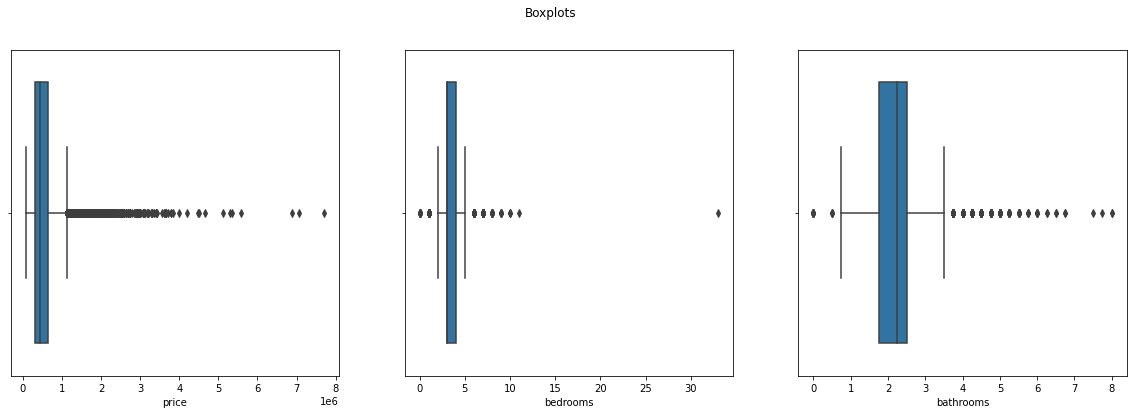

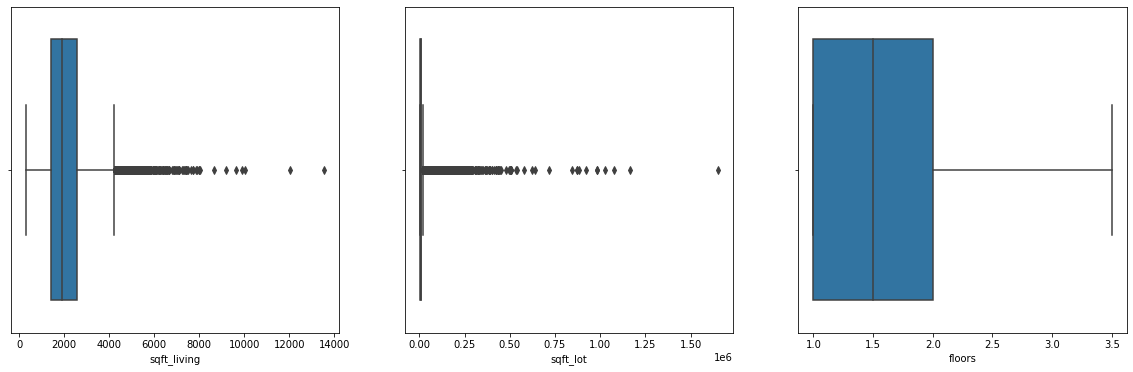

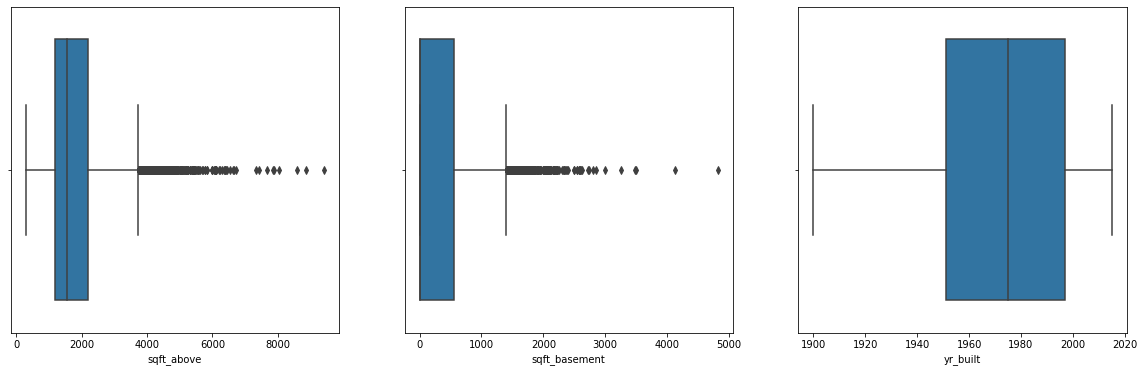

In [10]:
# Checking for outliers in our data
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = df['price'], ax=ax1)
sns.boxplot(x = df['bedrooms'], ax=ax2)
sns.boxplot(x = df['bathrooms'], ax=ax3)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = df['sqft_living'], ax=ax4)
sns.boxplot(x = df['sqft_lot'], ax=ax5)
sns.boxplot(x = df['floors'], ax=ax6)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = df['sqft_above'], ax=ax7)
sns.boxplot(x = df['sqft_basement'], ax=ax8)
sns.boxplot(x = df['yr_built'], ax=ax9)

##1.4 Exploratory data analysis

###1.4.1 Univariate Analysis

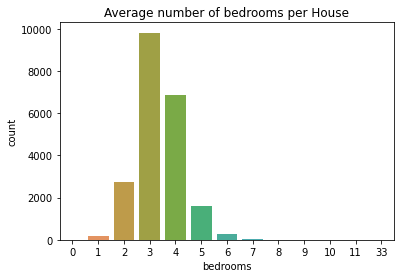

In [11]:
#Count plots
sns.countplot(x=df['bedrooms'])
plt.title('Average number of bedrooms per House')
plt.show()

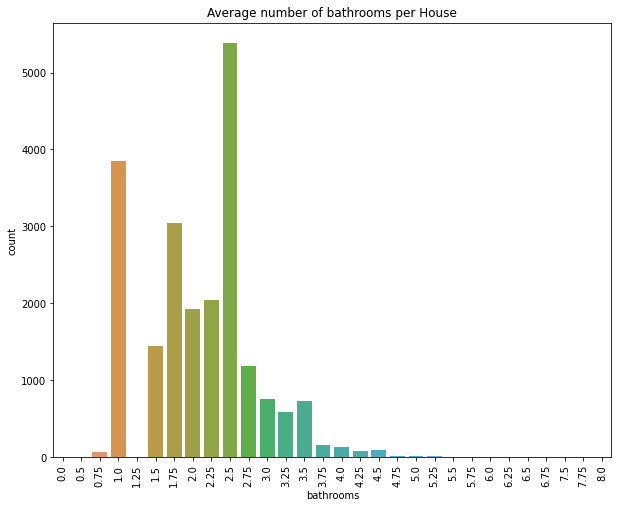

In [12]:
# Count plots for bathrooms 
plt.figure(figsize=(10,8))
sns.countplot(x=df['bathrooms'])
plt.title('Average number of bathrooms per House')
plt.xticks(rotation =90)
plt.show()

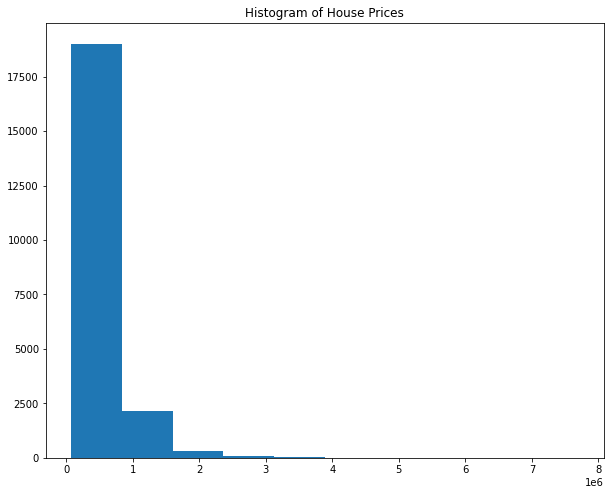

In [13]:
#Histogram of house prices
plt.figure(figsize = [10,8])
plt.hist(df.price)
plt.title('Histogram of House Prices')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


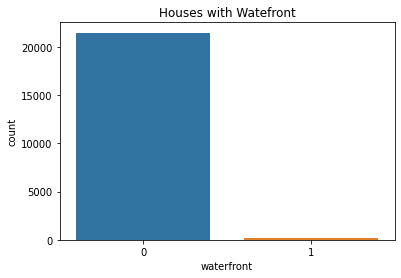

In [14]:
#Count plots
sns.countplot(df.waterfront)
plt.title('Houses with Watefront')
plt.show()

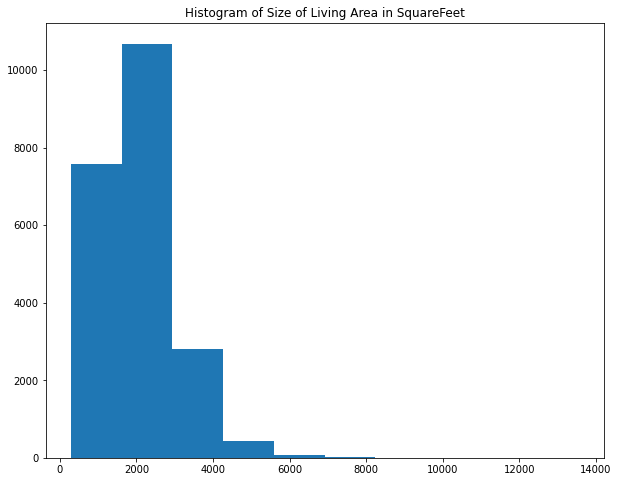

In [15]:
#Histogram of Size of Living Area in SquareFeet
plt.figure(figsize = [10,8])
plt.hist(df.sqft_living)
plt.title('Histogram of Size of Living Area in SquareFeet')
plt.show()

###1.4.2 Bivariate Analysis

In [16]:
# Get a description of the data
df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

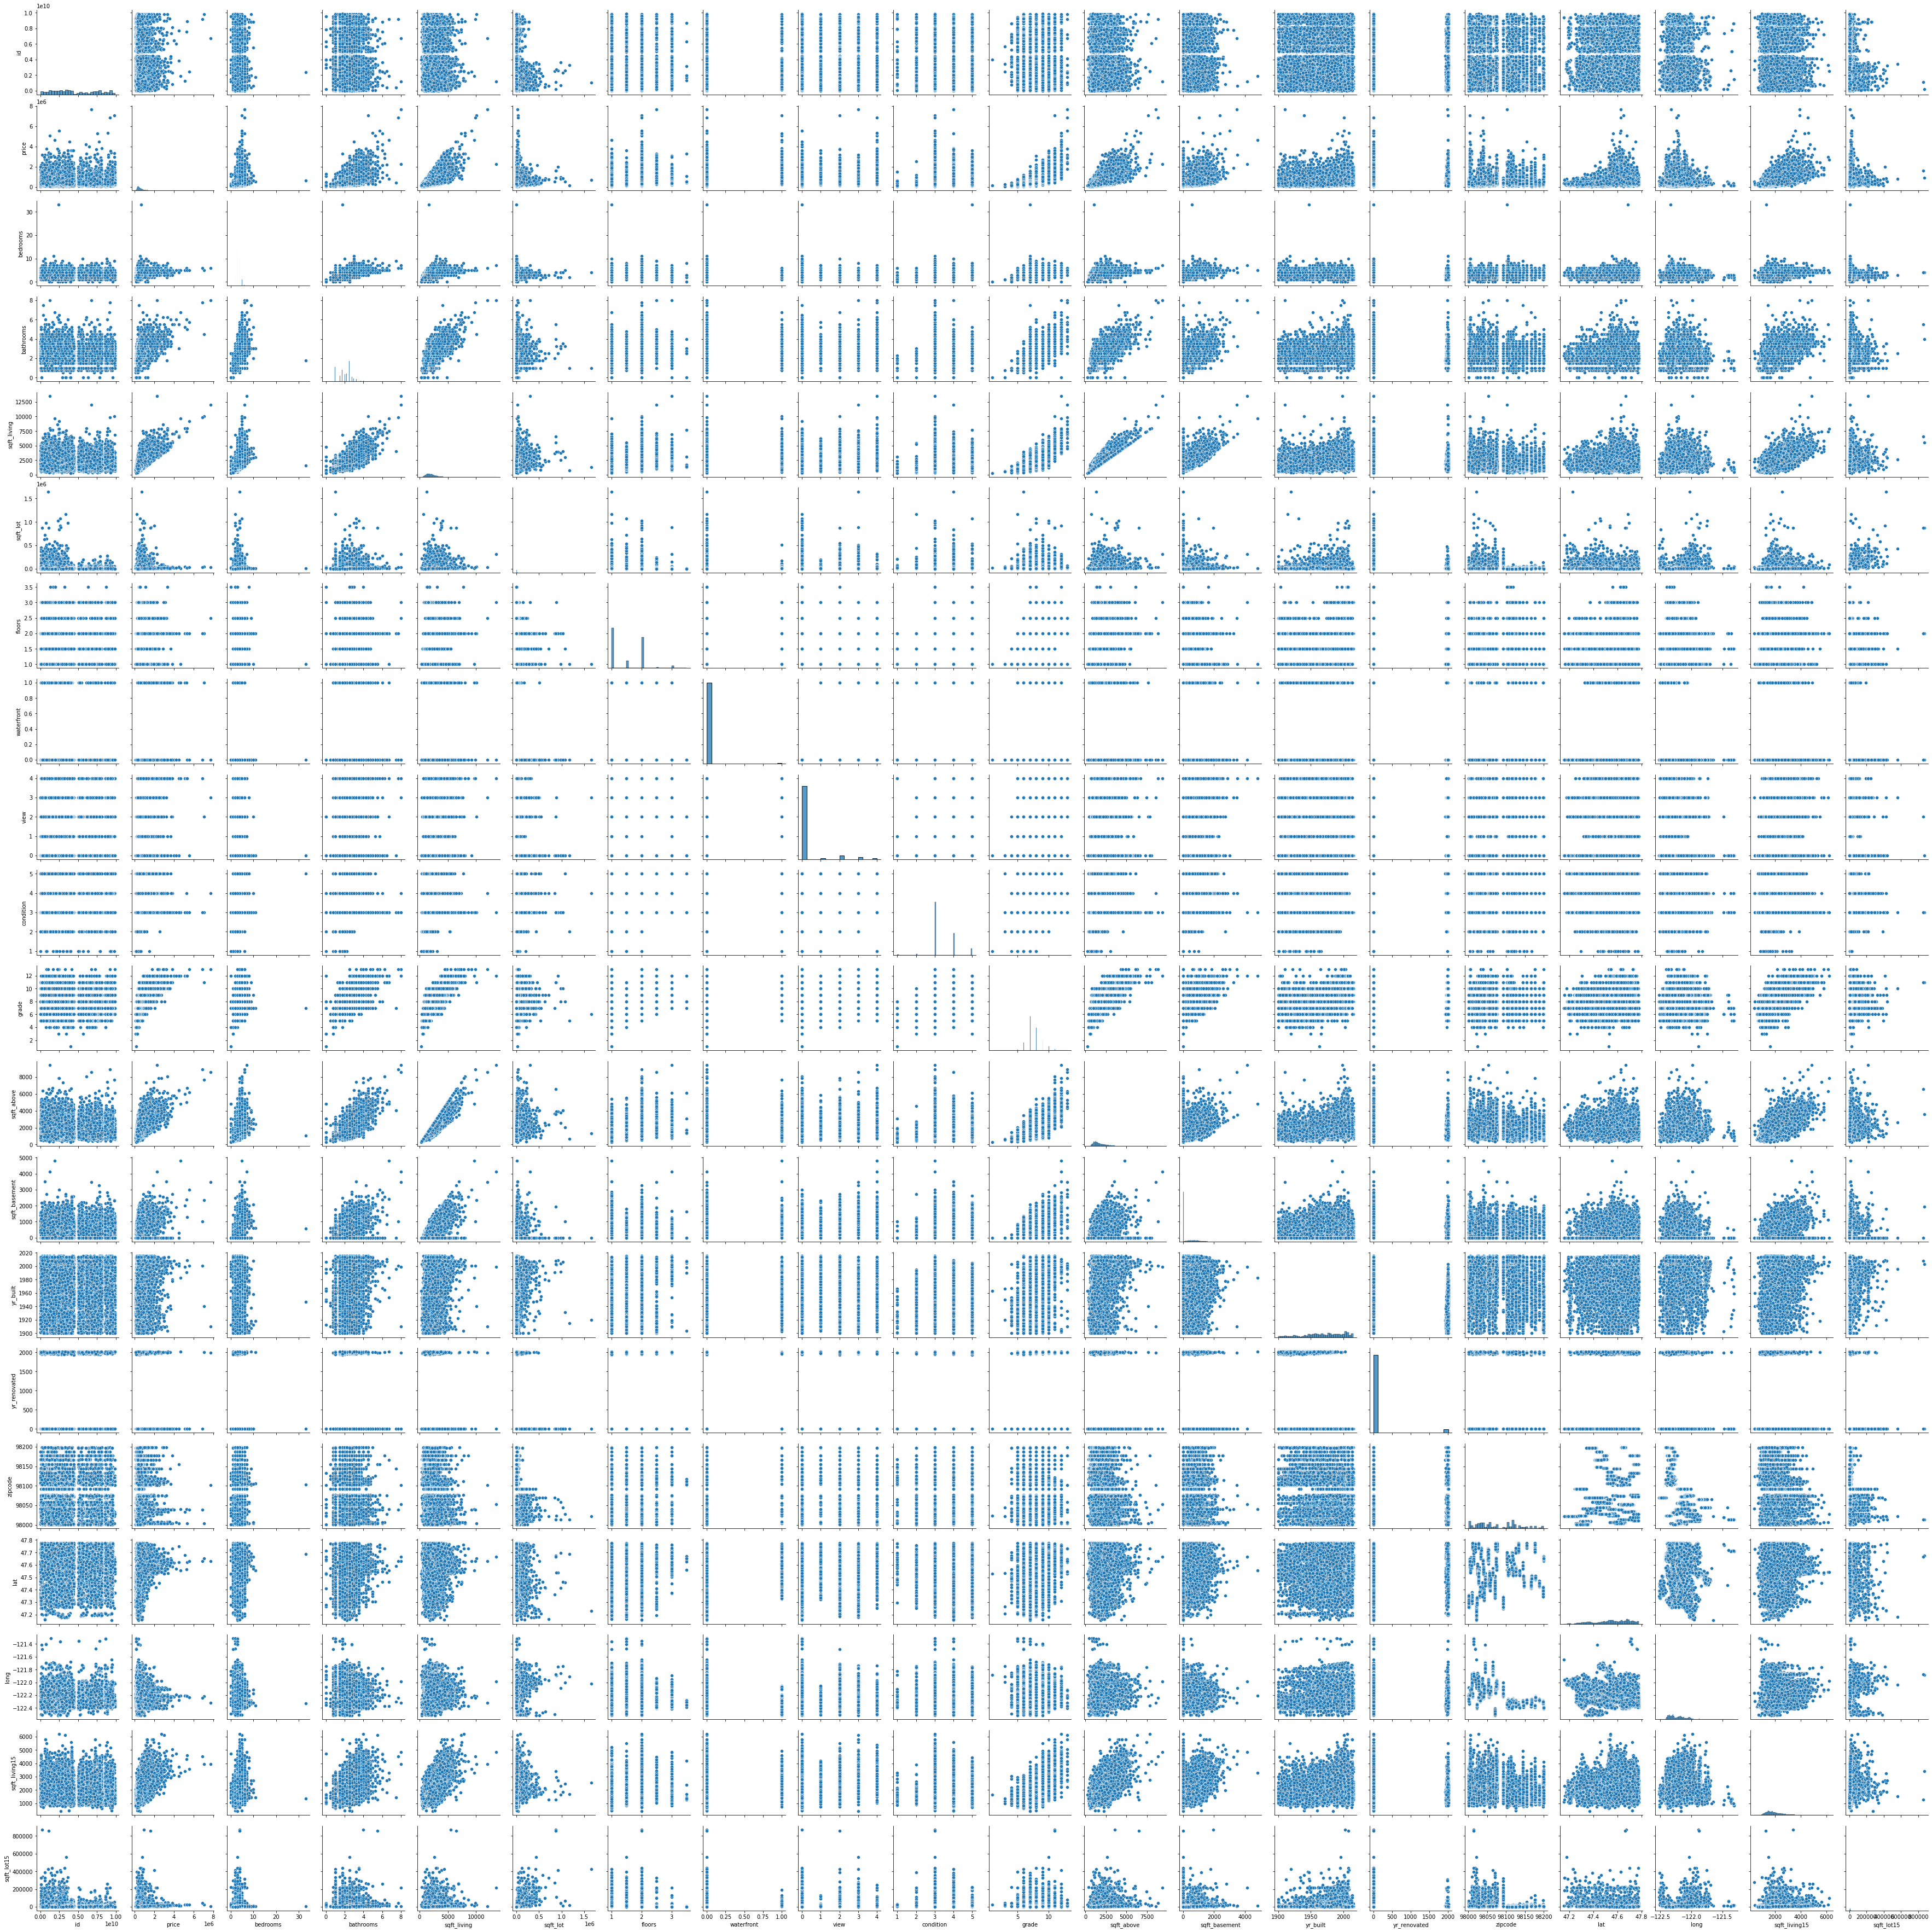

In [17]:
sns.pairplot(df)

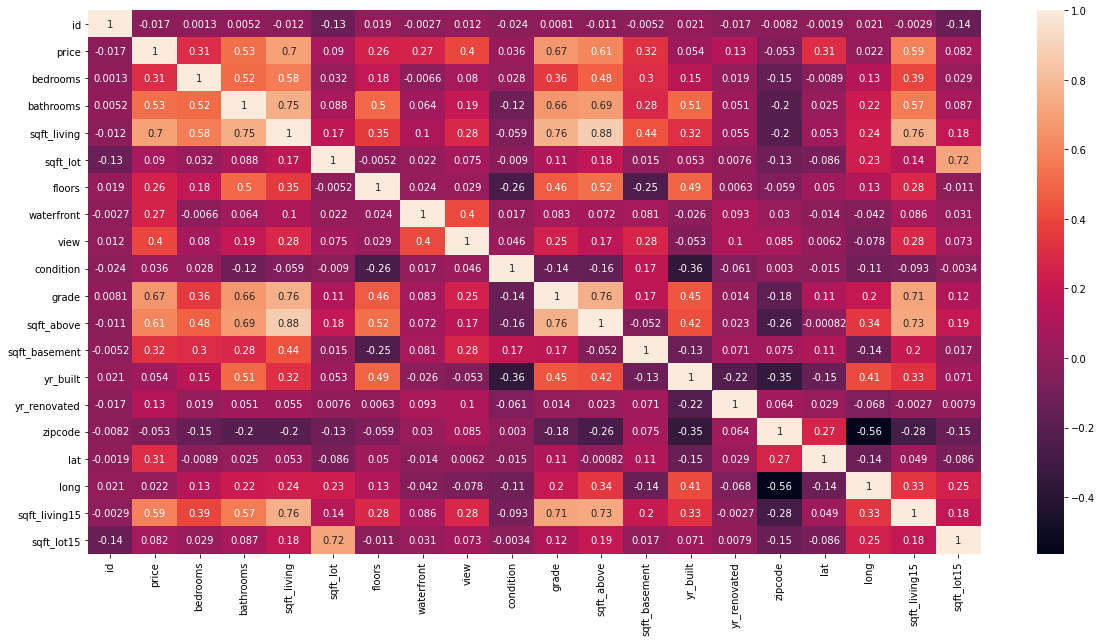

In [18]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

##1.5 Implementing the solution

Checking for multicollinearity

In [19]:
correlations= df.drop(columns=['price', 'id'],axis = 1).corr()
correlations

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.515884  ...       0.391638    0.029244
bathrooms      0.515884   1.000000  ...       0.568634    0.087175
sqft_living    0.576671   0.754665  ...       0.756420    0.183286
sqft_lot       0.031703   0.087740  ...       0.144608    0.718557
floors         0.175429   0.500653  ...       0.279885   -0.011269
waterfront    -0.006582   0.063744  ...       0.086463    0.030703
view           0.079532   0.187737  ...       0.280439    0.072575
condition      0.028472  -0.124982  ...      -0.092824   -0.003406
grade          0.356967   0.664983  ...       0.713202    0.119248
sqft_above     0.477600   0.685342  ...       0.731870    0.194050
sqft_basement  0.303093   0.283770  ...       0.200355    0.017276
yr_built       0.154178   0.506019  ...       0.326229    0.070958
yr_renovated   0.018841   0.050739  ...      -0.002673    0.007854
zipcode       -0.152668  -0.203866  ...      -0.279033   -0.147221
lat           -0.008931   0.024573  ...       0.048858   -0.086419
long           0.129473   0.223042  ...       0.334605    0.254451
sqft_living15  0.391638   0.568634  ...       1.000000    0.183192
sqft_lot15     0.029244   0.087175  ...       0.183192    1.000000

[18 rows x 18 columns]

In [20]:
# Checking the VIF
vif=pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.652063  -0.461171  ...       0.025213    0.085400
bathrooms     -0.461171   3.350793  ...       0.092133    0.071471
sqft_living   -0.194966  -5.071189  ...      -0.994869   -0.183892
sqft_lot       0.049361  -0.024127  ...       0.163944   -1.459319
floors         0.049695  -0.675075  ...       0.272617    0.072658
waterfront     0.063235   0.009760  ...       0.054452   -0.018470
view           0.114111  -0.041645  ...      -0.325615   -0.007493
condition     -0.050767  -0.137020  ...       0.075861   -0.028255
grade          0.307048  -0.268005  ...      -0.911603    0.071874
sqft_above    -0.699368   3.299068  ...      -0.638711   -0.009918
sqft_basement -0.390436   1.364189  ...       0.008273    0.029043
yr_built       0.134498  -0.935779  ...       0.077715   -0.033740
yr_renovated   0.045454  -0.259782  ...       0.099191   -0.022232
zipcode        0.080112   0.041796  ...       0.210202   -0.015505
lat            0.050789  -0.040956  ...      -0.094802    0.036659
long           0.017395   0.054055  ...      -0.354558   -0.160885
sqft_living15  0.025213   0.092133  ...       2.979713   -0.125612
sqft_lot15     0.085400   0.071471  ...      -0.125612    2.135668

[18 rows x 18 columns]

Sq_ft living and sq_ft above have high correlations with the other features. 

###1.5.1 Multiple Linear Regression

In [21]:
# Separate the dependent variable from the independent variables
X = df.drop(['id', 'price', 'sqft_living', 'sqft_above'], axis=1)
y = df.price

In [22]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
from sklearn import metrics
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 132483.68612617577
Mean Squared Error: 50459051973.03074
Root Mean Squared Error: 224630.92390192125
R-Squared: 0.6666172183884453


In [25]:
#Installing module to perform Bartlett's test on Dataset
!pip install pingouin

In [26]:
#Performing Barlett's test
import pingouin as pg
pg.homoscedasticity(df, method="bartlett", alpha=.05)

T  pval  equal_var
bartlett  389361.701652   0.0      False

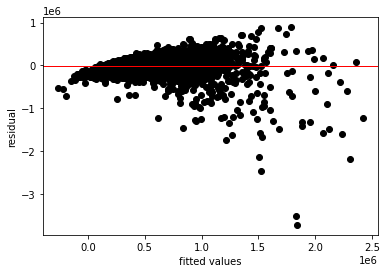

In [27]:
# residual plots and test for heteroskedasticity
y_pred=regressor.predict(X_test)
residuals = np.subtract(y_pred, y_test)
#plotting the residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The multiple linear regression model returns an accuracy of 66.66%. However, the dataset has Heteroskedasticity as shown by the Bartlett's test thereby violating an assumption that MLR is based on. This means using MLR is not best for this data.

###1.5.2 Quantile Regression

In [28]:
#features and label
X = df.drop(['price', 'id'], axis=1).values
y = df.price.values

#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
import statsmodels.formula.api as smf
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + view + grade + lat + long + sqft_above+ sqft_living15', df)

res = mod.fit(q = .5)

# Then print out the summary of our model
#
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4140
Model:                       QuantReg   Bandwidth:                   2.130e+04
Method:                 Least Squares   Sparsity:                    2.781e+05
Date:                Sat, 29 May 2021   No. Observations:                21613
Time:                        11:26:06   Df Residuals:                    21603
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.673e+06   9.41e+05     -6.027      0.000   -7.52e+06   -3.83e+06
bedrooms      -1.358e+04   1291.890    -10.509      0.000   -1.61e+04    -1.1e+04
bathrooms     -6896.5635   1963.904     -3.512      0.000   -1.07e+04   -3047.166
sqft_living     132.3625      2.774  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [32]:
quantiles = [0.25,0.5,0.75] 
models = []
params = []

# We build models for each quantile in our list quantiles 
# we also store the model parameters in a list called params. 
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + view + grade + lat + long + sqft_above+ sqft_living15', df)
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bedrooms'], res.params['bathrooms'], res.params['sqft_living'], res.params['view'],res.params['grade'], res.params['lat'],res.params['long'],res.params['sqft_above'],res.params['sqft_living15']])
# Lastly we make a dataframe of
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['quantiles', 'intercept','bedrooms_coef','bathrooms_coef','sqft_living_coef','view_coef','grade_coef','lat_coef','long_coef','sqft_above_coef','sqft_living15_coef'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


quantiles     intercept  ...  sqft_above_coef  sqft_living15_coef
0       0.25 -1.924118e+07  ...         3.913860           27.097597
1       0.50 -5.672792e+06  ...       -14.144672           10.053204
2       0.75 -5.631187e+07  ...       -14.345319           36.172322

[3 rows x 11 columns]

In [33]:
#Getting summary report of dataset at 0.5 Quantile
quantiles = [0.25,0.5,0.75] 
import statsmodels.formula.api as smf
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_basement + yr_built + zipcode + sqft_living15 + sqft_lot15', df)
for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3163
Model:                       QuantReg   Bandwidth:                   2.101e+04
Method:                 Least Squares   Sparsity:                    3.749e+05
Date:                Sat, 29 May 2021   No. Observations:                21613
Time:                        11:26:19   Df Residuals:                    21600
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -51.8242      0.574    -90.231      0.000     -52.950     -50.698
bedrooms      -2.337e+04   1447.397    -16.147      0.000   -2.62e+04   -2.05e+04
bathrooms          3e+04   2561.364     11.711      0.000     2.5e+04     3.5e+04
sqft_living      55.6899      2.775  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3861
Model:                       QuantReg   Bandwidth:                   2.415e+04
Method:                 Least Squares   Sparsity:                    3.381e+05
Date:                Sat, 29 May 2021   No. Observations:                21613
Time:                        11:26:23   Df Residuals:                    21600
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -22.6956      0.628    -36.155      0.000     -23.926     -21.465
bedrooms      -2.914e+04   1574.474    -18.505      0.000   -3.22e+04   -2.61e+04
bathrooms      3.798e+04   2707.885     14.024      0.000    3.27e+04    4.33e+04
sqft_living      84.4411      3.048  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


Our quantile regression model achieved an accuracy of 41.40%

###1.5.3 Ridge regression

In [34]:
# Setting up our X and y 
X = df.drop(['price', 'id'], axis=1)
y = df['price']

In [35]:
# Splitting the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

In [36]:
# feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Applying ridge regression on the training dataset
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [38]:
# Look for the best parameters to use
search.fit(X_train,y_train)
print(search.best_params_)

{'alpha': 0.001}


In [39]:
# Model the data
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [40]:
# Making predictions
y_pred=ridge.predict(X_test)

In [41]:
# Checking the metrics for the model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("MSE: ", (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test))))
print("RMSE: ", (np.sqrt(mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))))
print("Accuracy: ", (r2_score(y_true=y_test,y_pred=ridge.predict(X_test))))

MSE:  36910509633.728485
RMSE:  192121.08065938126
Accuracy:  0.7148825286430752


In [42]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 31963.5673482383,
 'bedrooms': -33580.234669386875,
 'condition': 16676.61232326244,
 'floors': 2108.4570904935367,
 'grade': 113179.44099234747,
 'lat': 83954.45651815456,
 'long': -32088.62075916047,
 'sqft_above': 78425.9041118613,
 'sqft_basement': 25570.19486122476,
 'sqft_living': 83050.97563272077,
 'sqft_living15': 14610.119372975862,
 'sqft_lot': 4952.418908210468,
 'sqft_lot15': -10375.59005735357,
 'view': 39405.79817291667,
 'waterfront': 49336.97880940448,
 'yr_built': -76448.47534933155,
 'yr_renovated': 8087.05369353432,
 'zipcode': -31377.875499384347}

The accuracy achieved after using ridge regression is 71.5%

###1.5.4 Lasso Regression

In [43]:
# Features and label
X = df.drop(['price', 'id'], axis=1)
y = df['price']

In [44]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
#setting parameter space
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

#lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [47]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients

gridlasso.fit(X_train, y_train) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))
print("lasso accuracy:", r2_score(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15709335951298.5, tolerance: 178133856304.13672
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18823845668660.5, tolerance: 200601636410.69806
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16704748121661.312, tolerance: 186824072267.357
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188649168131

lasso score: 0.6949536925136917
lasso MSE: 36326414258.13172
lasso RMSE: 190594.89567701367
lasso accuracy: 0.6949536925136917
lasso best estimator coef: [-32726.28896005  30466.61968926 265807.58682578   7429.30521106
   4027.46139799  54479.9757992   40713.82951121  17029.28160506
 110209.95726111 -85193.58961445 -60070.60351463 -76932.86775789
   8217.73123425 -30368.95804126  83858.23845409 -31331.03336331
  16635.60062198 -12980.87491332]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22305900187862.75, tolerance: 240120828240.2951
  positive)


In [48]:
coef_dict_baseline = {}
for coef, feat in zip(gridlasso.best_estimator_.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 30466.619689262883,
 'bedrooms': -32726.288960052025,
 'condition': 17029.281605061653,
 'floors': 4027.461397989868,
 'grade': 110209.95726110936,
 'lat': 83858.23845408943,
 'long': -31331.033363309907,
 'sqft_above': -85193.58961444977,
 'sqft_basement': -60070.60351463018,
 'sqft_living': 265807.5868257849,
 'sqft_living15': 16635.60062197624,
 'sqft_lot': 7429.3052110642575,
 'sqft_lot15': -12980.874913322916,
 'view': 40713.82951120841,
 'waterfront': 54479.97579919917,
 'yr_built': -76932.86775788642,
 'yr_renovated': 8217.731234247507,
 'zipcode': -30368.958041255635}

The accuracy for the ridge model is 69.5%

###1.5.5 Elastic net regression

In [49]:
# Features and label
X = df.drop(['price', 'id'], axis=1)
y = df.price

In [50]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [51]:
# Perform feature scaling to ensure that the data is normalised
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# Applying elastic net regression on the training dataset
from sklearn.linear_model import ElasticNet

# Model the data
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic, param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [53]:
# Fit the model and display the best parameters and the results
search.fit(X_train, y_train)
best_parameters = search.best_params_
print('Best parameters:' + str(best_parameters))
print('Best score:' + str(abs(search.best_score_)))

Best parameters:{'alpha': 1e-05, 'l1_ratio': 0.8}
Best score:39923936437.22075


In [54]:
# Modelling using the new parameters
elastic = ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
# Making a prediction 
y_pred = elastic.predict(X_test)

In [56]:
# Checking the metrics for the model 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

print('Accuracy:', r2_score(y_true=y_test, y_pred=y_pred))

Mean Squared Error: 43100371708.23618
Accuracy: 0.6864539709837423


The accuracy for elastic net regression is 68.6%

##1.6 Challenging the solution

We didn't drop the outliers in our data and this might have had an effect on the accuracy of our models. 

##1.7 Conclusions

Ridge regression gave us the best accuracy at slightly over 71% while quantile regression is 41.4% 

For such a dataset with highly correlated variables, it makes sense that ridge regression will have the highest accuracy over all the other regression algorithms. 

## Recommendations

For all the models, the grade of the house, the size of the living room in square feet, the view, whether or not the house had a waterfront, condition of the property as well as location all had the greatest weight in determining the prices for the houses. In setting prices, Hass consult should place emphasis on these features as they have proven to be the greatest determinants.

## Follow up questions

### a). Did we have the right data?
Yes. The data we had was right and was useful in our project.

### b). Do we need other data to answer our question?

Yes definitely. The data we had was quite right but we could have used some more data and a couple of more features.

### c). Did we have the right question?

Yes we had the right question. Taking into consideration the objective, the right question was asked and would allow for the right analysis and modelling to achieve the objective